# 6장 예측 함수 정의 하기

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [1]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no suc

In [2]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [36]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

In [37]:
# 파이토치 관련 라이브러리
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchviz import make_dot

In [6]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [7]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

## 선형 회귀 (Linear regression) 손실 함수

### Linear hidden layers

In [38]:
def linear(x, w, b):
  y = torch.matmul(x, w) + b
  return y 

x = torch.FloatTensor([[1, 2, 3],
                       [2, 4, 6]])
print("Initial value", "="*50)
print("x: \n", x)

w1 = torch.rand(3, 4) #3행 4열 
b1 = torch.ones(1, 4) #1행 4열 
print("w1: \n", w1)
print("b1: \n", b1)


Initial value ==================================================
x: 
 tensor([[1., 2., 3.],
        [2., 4., 6.]])
w1: 
 tensor([[0.9106, 0.3962, 0.5819, 0.4329],
        [0.7991, 0.5760, 0.2983, 0.4747],
        [0.1709, 0.0402, 0.3605, 0.4823]])
b1: 
 tensor([[1., 1., 1., 1.]])


In [6]:
## Hidden layer 1
print("Hidden layer 1", "="*50)
h1 = linear(x, w1, b1)
print("linear(x, w1, b1): \n")
print(h1)
# b = torch.tensor([3])

# Hidden layer 2
print("Hidden layer 2", "="*50)
w2 = torch.rand(4, 3)
print("w2: \n", w2)
b2 = torch.ones(1, 3)
print("b2: \n", b2)

print()
h2 = linear(h1, w2, b2)
print("linear(w1, w2, b): \n", "="*50)
print(h2)

Hidden layer 1 ==================================================
linear(x, w1, b1): 

tensor([[3.7186, 4.1672, 4.1778, 4.2158],
        [6.4372, 7.3345, 7.3556, 7.4316]])
Hidden layer 2 ==================================================
w2: 
 tensor([[0.4634, 0.3073, 0.2938],
        [0.1342, 0.1632, 0.0632],
        [0.1083, 0.1290, 0.0216],
        [0.3939, 0.7254, 0.2954]])
b2: 
 tensor([[1., 1., 1.]])

linear(w1, w2, b): 
tensor([[ 5.3955,  6.4197,  3.6916],
        [ 8.6913, 10.5145,  5.7092]])


### 회귀 분석: Single data

In [7]:
# torch.manual_seed(1)
input = torch.randn(1, requires_grad=True) #표준정규분포 :평균0, 분산 1
target = torch.randn(1) #목표표

print("Before SDG","="*50)
print("input: ", input)
print("target: ", target) 

#prediction 
loss = nn.MSELoss() # class #loss function 
optimizer = optim.SGD([input], lr=0.02) # optimizer

for epoch in range(100):
#prediction inputs = inputs 

  loss_result = loss(input, target)
  # loss_result = (input - target)**2
  # print("loss_result: ", loss_result)
  
  optimizer.zero_grad() # Sets the gradients of all optimized torch.Tensors to zero.
  loss_result.backward() # Computes the gradient of current tensor wrt graph leaves
  optimizer.step()

print("After SDG", "="*50)
print("input: ", input)
print("target: ", target)

Before SDG ==================================================
input:  tensor([-0.0046], requires_grad=True)
target:  tensor([0.2764])
After SDG ==================================================
input:  tensor([0.2717], requires_grad=True)
target:  tensor([0.2764])


### 회귀 분석: Batch data

x = 
 tensor([-3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
        -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.3842e-08,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00,
         2.5000e+00,  2.6000e+00,  2.7000e+00,  2.8000e+00,  2.9000e+00])
y = 
 tensor([-5.0340, -6.2877, -5.8800, -4.1746, -4.6124, -2.2705, -3.3965, -3.7927,
        -3.2916, -3.9506, -0.57

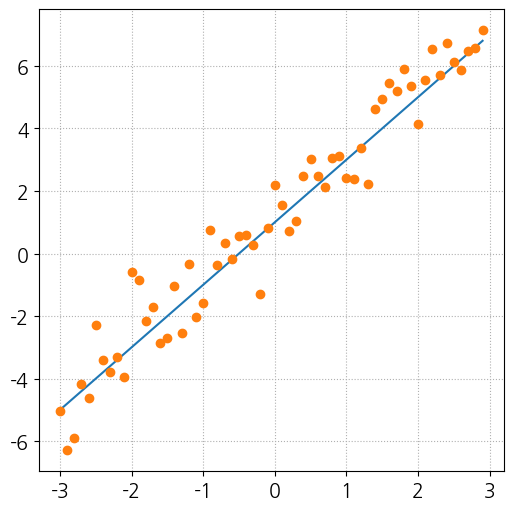

In [8]:
x = torch.arange(-3, 3, 0.1)
y = 2 * x + 1
y1 = 2 * x + 1 + torch.randn(x.shape)
print("x = \n", x)
print("y = \n", y1)

plt.plot(x.numpy(), y.numpy())
plt.plot(x.numpy(), y1.numpy(), "o")
plt.show()

### 회귀 분석: batch data

x = 
 tensor([-3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
        -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.3842e-08,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00,
         2.5000e+00,  2.6000e+00,  2.7000e+00,  2.8000e+00,  2.9000e+00])
y = 
 tensor([-3.9817, -5.7006, -4.9692, -3.4078, -3.1057, -4.4587, -4.4151, -2.1381,
        -5.3869, -1.7354, -2.83

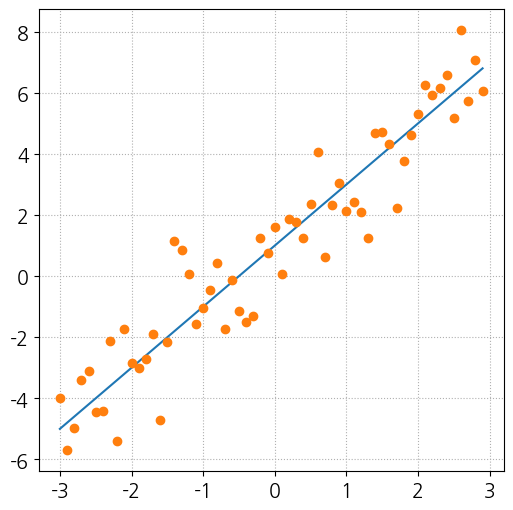

In [9]:
## Simulate data
#input 1개, output 1개 
x = torch.arange(-3, 3, 0.1)
y = 2 * x + 1
y1 = 2 * x + 1 + torch.randn(x.shape)
print("x = \n", x)
print("y = \n", y1)

plt.plot(x, y)
plt.plot(x, y1, "o")
plt.show()

In [10]:
# Initial weight and bias
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print("Initial value = \n", "="*50)
print("w: ", w)
print("b: ", b)

# Define loss and optimizer
lr = 0.01
loss = nn.MSELoss()
optimizer = optim.SGD([w, b], lr=lr)

n_epochs = 100

#training 
for epoch in range(n_epochs):

#prediction 
    yhat = w*x + b

    ##loss_result 
    loss_result = loss(yhat, y1)
    
    optimizer.zero_grad()
    loss_result.backward()
    optimizer.step()

    if epoch % 10 == 0:
      print("epoch: ", epoch, "w: ", w.item(), "b: ",
            b.item(), "loss: ", loss_result.item())


print("After SGD", "="*50)
print(w, b)

Initial value = 
w:  tensor([1.1105], requires_grad=True)
b:  tensor([0.0699], requires_grad=True)
epoch:  0 w:  1.159611463546753 b:  0.08712642639875412 loss:  4.140627384185791
epoch:  10 w:  1.5154355764389038 b:  0.2439573109149933 loss:  2.4553022384643555
epoch:  20 w:  1.7081222534179688 b:  0.3745816648006439 loss:  1.8596384525299072
epoch:  30 w:  1.8127847909927368 b:  0.48265695571899414 loss:  1.6153441667556763
epoch:  40 w:  1.8698930740356445 b:  0.571694552898407 loss:  1.4966673851013184
epoch:  50 w:  1.9012631177902222 b:  0.6448453068733215 loss:  1.4302908182144165
epoch:  60 w:  1.918663501739502 b:  0.7048356533050537 loss:  1.3896905183792114
epoch:  70 w:  1.9284504652023315 b:  0.7539752721786499 loss:  1.3636542558670044
epoch:  80 w:  1.9340623617172241 b:  0.794195830821991 loss:  1.3465768098831177
epoch:  90 w:  1.9373639822006226 b:  0.8270993232727051 loss:  1.3352608680725098
After SGD ==================================================
tensor([1.9392

## 예측 함수의 내부 구조

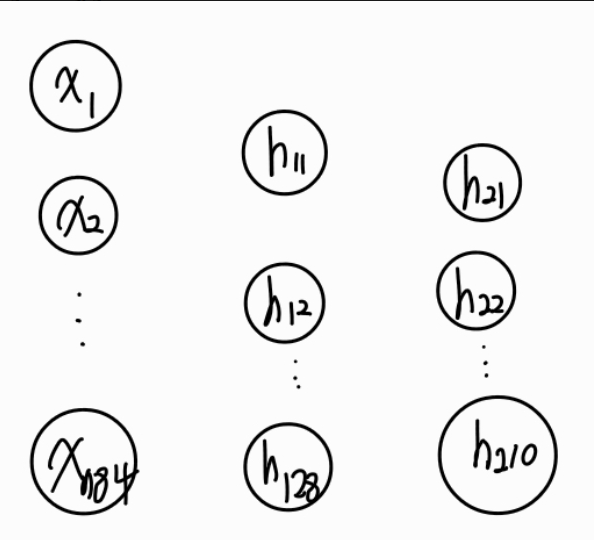 

In [11]:
# 레이어 함수 정의

# 첫번째 선형 함수
# 784 입력 수
# 128 출력 수
l1 = nn.Linear(784, 128) #instnace 

# 두번째 선형 함수
# 128 입력 수
# 10 출력 수
l2 = nn.Linear(128, 10)

# 활성화 함수
relu = nn.ReLU(inplace=True) #True로  하면 값을 직접 지정 #True안하면 값을 저장 

In [12]:
# 입력 텐서로부터 출력 텐서를 계산

# 더미 입력 데이터 작성
inputs = torch.randn(100, 784) #input설정 

# 중간 텐서 1 계산
m1 = l1(inputs) 

# 중간 텐서 2 계산
m2 = relu(m1) 

# 출력 텐서 계산
outputs = l2(m2) 

# 입력 텐서와 출력 텐서 shape 확인
print('입력 텐서', inputs.shape)
print('출력 텐서', outputs.shape)

입력 텐서 torch.Size([100, 784])
출력 텐서 torch.Size([100, 10])


In [13]:
# nn.Sequential을 사용해 전체를 합성 함수로 정의 
#각각을 하나의 함수로 정의 

net2 = nn.Sequential(
    l1,
    relu,
    l2
)

outputs2 = net2(inputs)

# 입력 텐서와 출력 텐서의 shape 확인
print('입력 텐서', inputs.shape)
print('출력 텐서', outputs2.shape)

입력 텐서 torch.Size([100, 784])
출력 텐서 torch.Size([100, 10])


###  활성화 함수의 목적
이 절에서는 예측 결과 그래프(그림 4-9에서 그림 4-11까지)가 중요하며, 따라서 지금 시점에서 구현 코드의 의미를 이해하지 못하더라도 상관없다. 아래의 코드는 어디까지나 참고를 위해 작성되었다.

In [14]:
# 훈련 데이터, 검증 데이터 계산
np.random.seed(123)
x = np.random.randn(100,1)

# y는 x^2에 난수를 1/10만큼 더한 값
y = x**2 + np.random.randn(100,1) * 0.2 

#train set(0.7), test(validation)set (0.3 ) => 0.7학습데이터로 0.3테스트 검증 

# 데이터를 50건씩 훈련용과 검증용으로 나눔
x_train = x[:50,:] #50개
x_test = x[50:,:]  #50개 
y_train = y[:50,:]
y_test = y[50:,:] 

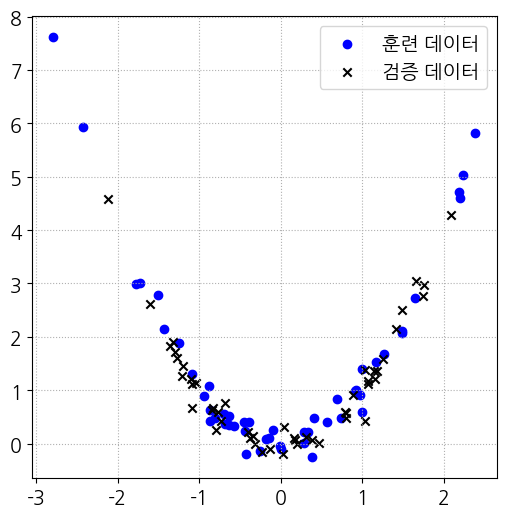

In [ ]:
# 산포도 출력
plt.scatter(x_train, y_train, c='b', label='훈련 데이터')
plt.scatter(x_test, y_test, c='k', marker='x', label='검증 데이터')
plt.legend()  #범례추가(훈련/검증 데이터 구분)
plt.show()

In [16]:
# 입력 변수 x와 정답 yt의 텐서화

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

### 선형 회귀 모델의 경우

In [17]:
# 모델 정의

#클래스 상속을 통한 모델 만들기 
class Net(nn.Module):
    def __init__(self):
        #  부모 클래스 nn.Modules 의 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(1, 1) #입력1개에 출력 1개 

    # 예측 함수 정의
    def forward(self, x):  #L1=nn.Linear(1,1)
                            # m1 = L1(inputs)
        x1 = self.l1(x) # 선형 회귀 
        return x1

In [18]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 초기화)
net = Net()

# 최적화 알고리즘 : 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr) 

# 손실 함수： 평균 제곱 오차
criterion = nn.MSELoss() #Loss, Cost,Objective fun

# 반복 횟수
num_epochs = 10000

#  history 기록을 위한 배열 초기화(손실 함수 값 만을 기록)
history = np.zeros((0,2))

In [19]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):

    #prediction 
    # 경사 값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs) #예측값 

    # 오차 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 경사 하강법 적용
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.4f}')

Epoch 0 loss: 5.6959
Epoch 100 loss: 3.2305
Epoch 200 loss: 3.1969
Epoch 300 loss: 3.1963
Epoch 400 loss: 3.1963
Epoch 500 loss: 3.1963
Epoch 600 loss: 3.1963
Epoch 700 loss: 3.1963
Epoch 800 loss: 3.1963
Epoch 900 loss: 3.1963
Epoch 1000 loss: 3.1963
Epoch 1100 loss: 3.1963
Epoch 1200 loss: 3.1963
Epoch 1300 loss: 3.1963
Epoch 1400 loss: 3.1963
Epoch 1500 loss: 3.1963
Epoch 1600 loss: 3.1963
Epoch 1700 loss: 3.1963
Epoch 1800 loss: 3.1963
Epoch 1900 loss: 3.1963
Epoch 2000 loss: 3.1963
Epoch 2100 loss: 3.1963
Epoch 2200 loss: 3.1963
Epoch 2300 loss: 3.1963
Epoch 2400 loss: 3.1963
Epoch 2500 loss: 3.1963
Epoch 2600 loss: 3.1963
Epoch 2700 loss: 3.1963
Epoch 2800 loss: 3.1963
Epoch 2900 loss: 3.1963
Epoch 3000 loss: 3.1963
Epoch 3100 loss: 3.1963
Epoch 3200 loss: 3.1963
Epoch 3300 loss: 3.1963
Epoch 3400 loss: 3.1963
Epoch 3500 loss: 3.1963
Epoch 3600 loss: 3.1963
Epoch 3700 loss: 3.1963
Epoch 3800 loss: 3.1963
Epoch 3900 loss: 3.1963
Epoch 4000 loss: 3.1963
Epoch 4100 loss: 3.1963
Epoc

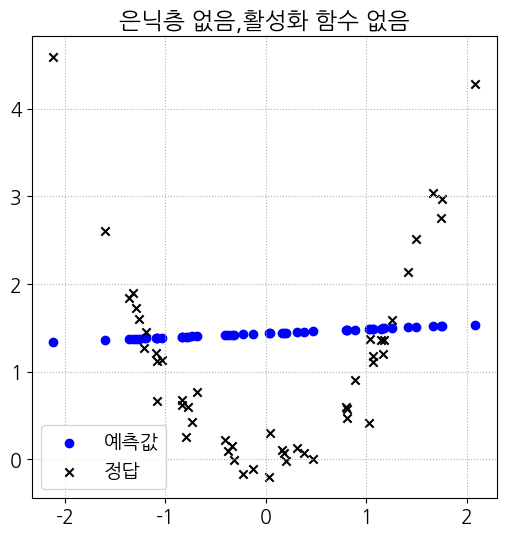

In [20]:
# 결과 그래프
labels_pred = net(inputs_test)

plt.title('은닉층 없음,활성화 함수 없음')
plt.scatter(inputs_test[:,0].data, labels_pred[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='정답')
plt.legend()
plt.show()

### 활성화 함수가 없는 딥러닝 모델의 경우

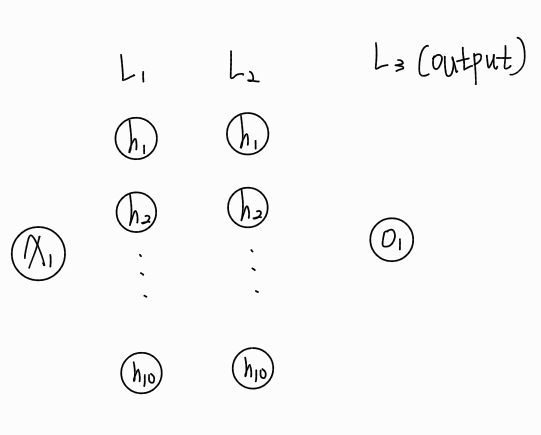

In [21]:
# 모델 정의

class Net2(nn.Module):
    def __init__(self):
        #  부모 클래스 nn.Modules 초기화
        super().__init__()

        # 출력층 정의 #Linear Layer를 쌓음 
        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 10) #hidden을 쌓음 
        self.l3 = nn.Linear(10,1)

    # 예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.l2(x1)
        x3 = self.l3(x2)
        return x3

In [22]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 초기화)
net2 = Net2()

# 최적화 알고리즘 : 경사 하강법
optimizer = optim.SGD(net2.parameters(), lr=lr)

# 손실 함수 : 평균 제곱 오차
criterion = nn.MSELoss()

# 반복 횟수
num_epochs = 10000

# history 기록을 위한 배열 초기화(손실 함수 값 만을 기록)
history = np.zeros((0,2))

In [23]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):

    # 경사 값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net2(inputs)

    # 오차 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 경사 하강법 적용
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 5.36001
Epoch 100 loss: 3.19642
Epoch 200 loss: 3.19631
Epoch 300 loss: 3.19631
Epoch 400 loss: 3.19631
Epoch 500 loss: 3.19631
Epoch 600 loss: 3.19631
Epoch 700 loss: 3.19631
Epoch 800 loss: 3.19631
Epoch 900 loss: 3.19631
Epoch 1000 loss: 3.19631
Epoch 1100 loss: 3.19631
Epoch 1200 loss: 3.19631
Epoch 1300 loss: 3.19631
Epoch 1400 loss: 3.19631
Epoch 1500 loss: 3.19631
Epoch 1600 loss: 3.19631
Epoch 1700 loss: 3.19631
Epoch 1800 loss: 3.19631
Epoch 1900 loss: 3.19631
Epoch 2000 loss: 3.19631
Epoch 2100 loss: 3.19631
Epoch 2200 loss: 3.19631
Epoch 2300 loss: 3.19631
Epoch 2400 loss: 3.19631
Epoch 2500 loss: 3.19631
Epoch 2600 loss: 3.19631
Epoch 2700 loss: 3.19631
Epoch 2800 loss: 3.19631
Epoch 2900 loss: 3.19631
Epoch 3000 loss: 3.19631
Epoch 3100 loss: 3.19631
Epoch 3200 loss: 3.19631
Epoch 3300 loss: 3.19631
Epoch 3400 loss: 3.19631
Epoch 3500 loss: 3.19631
Epoch 3600 loss: 3.19631
Epoch 3700 loss: 3.19631
Epoch 3800 loss: 3.19631
Epoch 3900 loss: 3.19631
Epoch 4000 l

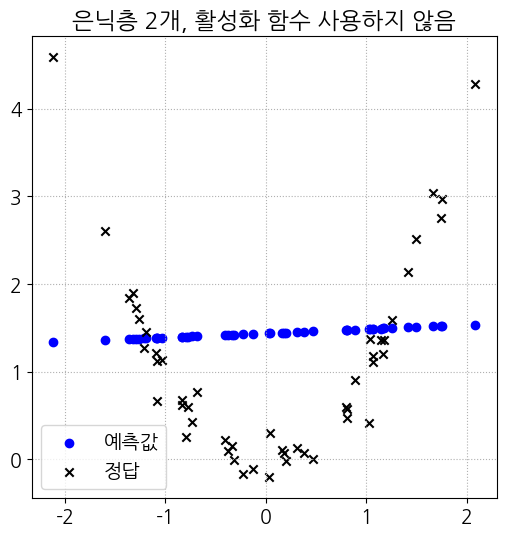

In [24]:
# 결과 그래프
labels_pred2 = net2(inputs_test)

plt.title('은닉층 2개, 활성화 함수 사용하지 않음')
plt.scatter(inputs_test[:,0].data, labels_pred2[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='정답')
plt.legend()
plt.show()

### 활성화 함수 사용가 있는 딥러닝 모델의 경우

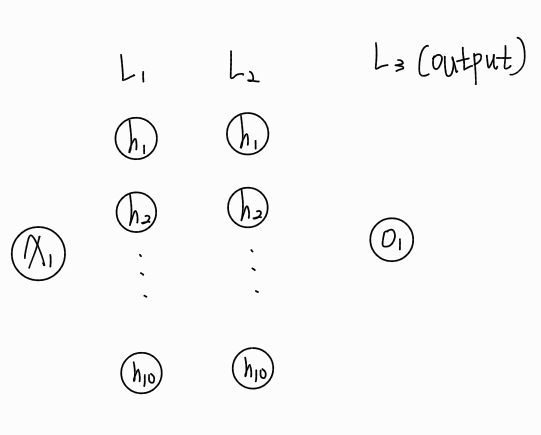

In [ ]:
# 모델 정의
#ReLU NonLinear 
class Net3(nn.Module):
    def __init__(self):
        #  부모 클래스 nn.Modules 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10,1)
        self.relu = nn.ReLU(inplace=True)

    # 예측 함수 정의
    def forward(self, x):
        x1 = self.relu(self.l1(x))
        x2 = self.relu(self.l2(x1))
        x3 = self.l3(x2)
        return x3

In [26]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 초기화)
net3 = Net3()

# 최적화 알고리즘 : 경사 하강법
optimizer = optim.SGD(net3.parameters(), lr=lr)

# 손실 함수： 평균 제곱 오차
criterion = nn.MSELoss()

# 반복 횟수
num_epochs = 10000

# history 기록을 위한 배열 초기화(손실 함수 값 만을 기록)
history = np.zeros((0,2))

In [29]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):

    # 경사 값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net3(inputs)

    # 오차 계산
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    # 경사 계산
    loss.backward()

    # 경사 하강법 적용
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 0.03361
Epoch 100 loss: 0.03360
Epoch 200 loss: 0.03359
Epoch 300 loss: 0.03358
Epoch 400 loss: 0.03357
Epoch 500 loss: 0.03357
Epoch 600 loss: 0.03356
Epoch 700 loss: 0.03355
Epoch 800 loss: 0.03355
Epoch 900 loss: 0.03354
Epoch 1000 loss: 0.03353
Epoch 1100 loss: 0.03352
Epoch 1200 loss: 0.03351
Epoch 1300 loss: 0.03350
Epoch 1400 loss: 0.03349
Epoch 1500 loss: 0.03348
Epoch 1600 loss: 0.03347
Epoch 1700 loss: 0.03346
Epoch 1800 loss: 0.03346
Epoch 1900 loss: 0.03345
Epoch 2000 loss: 0.03344
Epoch 2100 loss: 0.03343
Epoch 2200 loss: 0.03342
Epoch 2300 loss: 0.03342
Epoch 2400 loss: 0.03341
Epoch 2500 loss: 0.03340
Epoch 2600 loss: 0.03339
Epoch 2700 loss: 0.03339
Epoch 2800 loss: 0.03338
Epoch 2900 loss: 0.03337
Epoch 3000 loss: 0.03337
Epoch 3100 loss: 0.03336
Epoch 3200 loss: 0.03335
Epoch 3300 loss: 0.03335
Epoch 3400 loss: 0.03334
Epoch 3500 loss: 0.03333
Epoch 3600 loss: 0.03333
Epoch 3700 loss: 0.03332
Epoch 3800 loss: 0.03331
Epoch 3900 loss: 0.03331
Epoch 4000 l

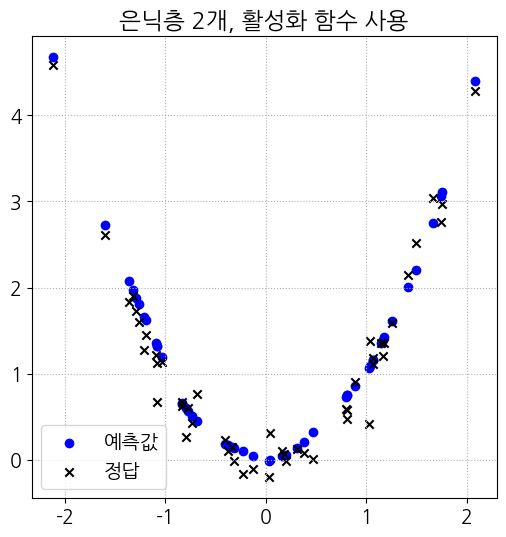

In [28]:
# 결과 그래프
labels_pred3 = net3(inputs_test)

plt.title('은닉층 2개, 활성화 함수 사용')
plt.scatter(inputs_test[:,0].data, labels_pred3[:,0].data, c='b', label='예측값')
plt.scatter(inputs_test[:,0].data, labels_test[:,0].data, c='k', marker='x',label='정답')
plt.legend()
plt.show()


## 이진 분류 (Binary classification) 비용 함수

### 시그모이드 (Sigmoid) 함수

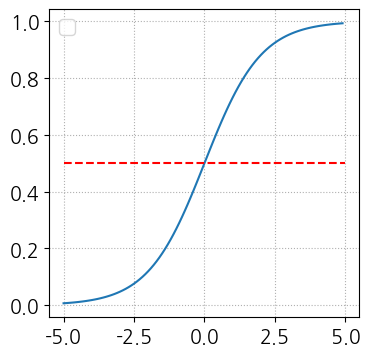

In [40]:
##
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

fig, axes = plt.subplots(figsize=(4, 4))
plt.plot(x, y)
plt.grid(linestyle = ":")
plt.hlines(0.5, -5, 5, colors="r", linestyles="dashed")
plt.legend()
plt.show()

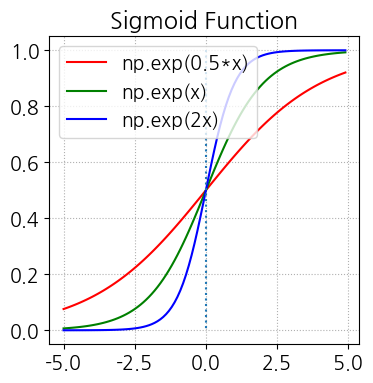

In [41]:

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

fig, axes = plt.subplots(figsize=(4, 4))
plt.plot(x, y1, 'r',label = "np.exp(0.5*x)") # W의 값이 0.5일때
plt.plot(x, y2, 'g',label = "np.exp(x)") # W의 값이 1일때
plt.plot(x, y3, 'b',label = "np.exp(2x)") # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.legend()
plt.show()

### 이진 분류 함수의 손실 함수와 비용 함수

❗주의점

딥러닝 모델에서는 실제 학습에 들어가기 전에 0이 아닌 무작위 값으로 초기화하는 것이 일반적

torch.zeros()로 W를 초기화하면 모든 가중치가 같아서 학습이 제대로 되지 않을 수 있음

그래서 실제로는 torch.nn.Linear, torch.randn(), torch.nn.init 등을 많이 사용합

In [ ]:
# torch.manual_seed(1)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] #입력데이터
y_data = [[0], [0], [0], [1], [1], [1]] #이진 분류(정답레이블블)
x_train = torch.FloatTensor(x_data) #Tensor로 변환 
y_train = torch.FloatTensor(y_data)

print("Data shape", "="*50)
print(x_train.shape)
print(y_train.shape)

# Parameter initialize
w = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

print("W: \n", w)
print("b: \n", b)

# sigmoid function => 
def prob(x, w, b): #예측함수(시그모이드함수 기반)
    y = 1/(1 + torch.exp(-(torch.matmul(x, w) + b)))
    return y

output = prob(x_train,w,b)
# prob = torch.sigmoid(x_train.matmul(W) + b)

print("output: \n", output)

# cost function :BCE => nn.BCELoss
def binary_cross_entropy(output,y_train,):
    losses = -(y_train*torch.log(output) + (1 - y_train)*torch.log(1 - output)) #각 샘플에 대한 개별 손실 
    cost = losses.mean() #전체 평균 손실 
    return cost


Data shape ==================================================
torch.Size([6, 2])
torch.Size([6, 1])
W: 
 tensor([[0.],
        [0.]], requires_grad=True)
b: 
 tensor([0.], requires_grad=True)
output: 
 tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [25]:
##hyper parameters 
lr =0.01 
optimizer = optim.SGD([w,b],lr=lr) 

num_epochs =1000

for epoch in range(num_epochs):

    #pred 
    outputs = prob(x_train, w, b) 

    #loss
    loss = binary_cross_entropy(outputs, y_train)
    loss.backward()
    optimizer.step() 
    optimizer.zero_grad()

    if epoch%100==0:
        print(f"Epoch = {epoch},Loss={loss.item():.4f}")


Epoch = 0,Loss=0.6931
Epoch = 100,Loss=0.5781
Epoch = 200,Loss=0.5352
Epoch = 300,Loss=0.5056
Epoch = 400,Loss=0.4840
Epoch = 500,Loss=0.4673
Epoch = 600,Loss=0.4537
Epoch = 700,Loss=0.4421
Epoch = 800,Loss=0.4320
Epoch = 900,Loss=0.4229


In [ ]:
#
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

#Sigmoid 
loss = nn.BCELoss() #nn.MSELoss() 
sigmoid = nn.Sigmoid()

W = torch.zeros((2, 1), requires_grad=True) #
b = torch.zeros(1, requires_grad=True)

lr = 0.01
optimizer = optim.SGD([W, b], lr=lr)
# print("optimizer: \n", optimizer)

nb_epochs = 1000
history = np.zeros((0,2))

for epoch in range(nb_epochs + 1):

##prediction 
    prediction = sigmoid(torch.matmul(x_train, W) + b)
    # prediction = torch.sigmoid(x_train.matmul(W) + b) # method
    cost = loss(prediction, y_train)
    # cost = F.binary_cross_entropy(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch},Loss={cost.item():.4f}")
        result = np.array([epoch,cost.item()])
        history = np.vstack([history,result])

Epoch 0,Loss=0.6931
Epoch 100,Loss=0.5781
Epoch 200,Loss=0.5352
Epoch 300,Loss=0.5056
Epoch 400,Loss=0.4840
Epoch 500,Loss=0.4673
Epoch 600,Loss=0.4537
Epoch 700,Loss=0.4421
Epoch 800,Loss=0.4320
Epoch 900,Loss=0.4229
Epoch 1000,Loss=0.4145


lr과 nb_epoch를 조절하여 조정 (흔치 않음음)

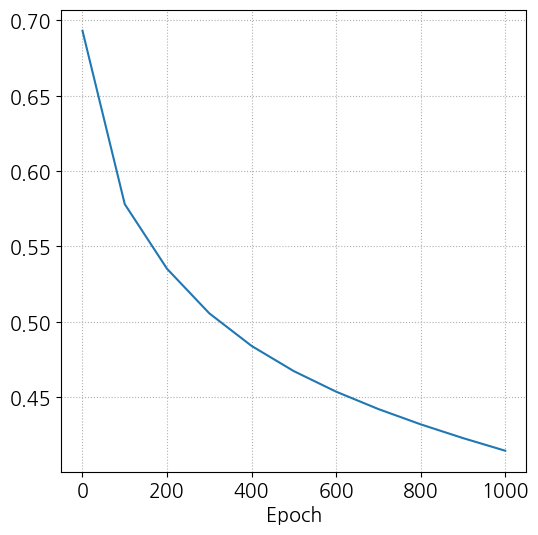

In [29]:
plt.plot(history[0:,0], history[:,1])
plt.xlabel('Epoch')
plt.show()

## 다중 분류 (Multinomial classification) 비용 함수

### Pytorch 소프트맥스 함수

In [2]:
import numpy as np

k_values = np.array([2, 3, 4])

def softmax(k):
    exp_values = np.exp(k)
    sum_exp_values = np.sum(exp_values) 
    return exp_values / sum_exp_values 

softmax_probs = softmax(k_values)

print("Softmax 확률값:")
for i, prob in enumerate(softmax_probs, start=1):
    print(f"k{i} = {prob:.4f}")

Softmax 확률값:
k1 = 0.0900
k2 = 0.2447
k3 = 0.6652


In [8]:
def softmax(x):
    y = np.exp(x)/np.sum(np.exp(x))
    return y


x = torch.rand(1, 4)
print('Tensor x = \n', x)

prob = softmax(x.numpy())
# prob = torch.softmax(x, dim = 1) # dim 0, 1
# prob = F.softmax(x, dim = 1)

print("Softmax = \n", prob)

Tensor x = 
 tensor([[0.8811, 0.8817, 0.8358, 0.0997]])
Softmax = 
 [[0.2929 0.2931 0.2799 0.1341]]


### Pytorch로 softmax 의 cost 함수 구현하기

dim=1을 주는 이유 

행별로 합을 구하기 위해서

=> 주지 않을 경우 모든 행렬을 더함

In [ ]:
import torch.nn.functional as F
# torch.manual_seed(425) 
x= torch.rand(3,5, requires_grad=True)
print("x=\n",x)

prob = F.softmax(x,dim=1)

# def softmax(x) : 
#     y= torch.exp(x)/torch.sum(torch.exp(x),dim=1).unsqueeze(-1) 
#     return y

# print("Manual softmax")
# print(softmax(x))

# print("Softmax =")
# F.softmax(x,dim=1) 
print("Prob=\n",prob) 

#one-hot encoding 
z= torch.randint(5,(3,1)) #category 5개, data=3
print("z=\n",z)
z_one_hot=torch.zeros(3,5)
z_one_hot.scatter_(dim=1,index=z,value=1)
print("z_one_hot=\n",z_one_hot)




x=
 tensor([[0.5688, 0.1722, 0.7192, 0.7594, 0.0405],
        [0.1512, 0.2266, 0.1355, 0.1664, 0.5767],
        [0.1491, 0.5611, 0.2309, 0.5646, 0.0547]], requires_grad=True)
Prob=
 tensor([[0.2158, 0.1451, 0.2508, 0.2611, 0.1272],
        [0.1783, 0.1923, 0.1755, 0.1810, 0.2729],
        [0.1661, 0.2508, 0.1803, 0.2517, 0.1511]], grad_fn=<SoftmaxBackward0>)
z=
 tensor([[2],
        [0],
        [2]])
z_one_hot=
 tensor([[0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])


In [ ]:
### One-hot vector 만들기
##F.cross_entropy(x,y) 로 구현 가능 

x = torch.rand(3, 5, requires_grad=True)
print("x: \n", x)
prob = F.softmax(x, dim = 1)
print("prob: \n", prob)

y = torch.randint(5, (3,)) # torch.int64
print("target y = ", y)

# 모든 원소가 0의 값을 가진 3 × 5 텐서 생성
y_one_hot = torch.zeros_like(x)
print(y_one_hot)
y_one_hot.scatter_(dim = 1, index = y.unsqueeze(dim = 1), value = 1) # Tensor.scatter_(dim, index, src, *, reduce=None)
print("one hot vector = \n", y_one_hot)


# 비용함수
print("Crossentroy cost function = ")
(-y_one_hot * torch.log(F.softmax(x, dim=1))).sum(dim=1).mean()

x: 
 tensor([[0.5971, 0.4262, 0.5627, 0.8802, 0.0129],
        [0.9031, 0.9236, 0.5213, 0.2737, 0.9671],
        [0.1985, 0.5300, 0.1797, 0.0509, 0.3873]], requires_grad=True)
prob: 
 tensor([[0.2130, 0.1796, 0.2058, 0.2828, 0.1188],
        [0.2324, 0.2373, 0.1587, 0.1239, 0.2478],
        [0.1837, 0.2558, 0.1802, 0.1585, 0.2218]], grad_fn=<SoftmaxBackward0>)
target y =  tensor([3, 3, 4])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
one hot vector = 
 tensor([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])
Crossentroy cost function = 


tensor(1.6192, grad_fn=<MeanBackward0>)

In [ ]:
### Crossentropy 비용함수
# Low level
torch.log(F.softmax(x, dim=1))

# High level
F.log_softmax(x, dim=1)

# cost function
(y_one_hot * - F.log_softmax(x, dim=1)).sum(dim=1).mean()

 # High level
# 세번째 수식
F.nll_loss(F.log_softmax(x, dim=1), y) # y =  tensor([1, 1, 3])

# 네번째 수식
F.cross_entropy(x, y) # z = torch.rand(3, 5, requires_grad=True), y = torch.randint(5, (3,))

#+++ 
nn.CrossEntropyLoss()

tensor(1.6192, grad_fn=<NllLossBackward0>)

In [44]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train) #float 32(int면 안됨)
y_train = torch.LongTensor(y_train) #int64

print(x_train.shape)
print(y_train.shape)

#
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)


# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)

# optimizer 설정
lr = 1
optimizer = optim.SGD([W, b], lr=lr)

nb_epochs = 100

for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) #Softmax => model class 
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean() #Cross entropy #nn.CrossEngtropyLoss() 

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {cost.item()}')

torch.Size([8, 4])
torch.Size([8])
Epoch 0, Loss: 1.0986123085021973
Epoch 10, Loss: 1.3778185844421387
Epoch 20, Loss: 3.4845387935638428
Epoch 30, Loss: 11.283027648925781
Epoch 40, Loss: 5.3597259521484375
Epoch 50, Loss: 2.1141769886016846
Epoch 60, Loss: 3.649526357650757
Epoch 70, Loss: 2.987056255340576
Epoch 80, Loss: 11.678892135620117
Epoch 90, Loss: 3.0448927879333496
Epoch 100, Loss: 6.191164970397949
